# Planejamento Plackett Burman

O objetivo desse planejamento consiste em propor uma formulação farmacêutica para liberação controlada de albendazol (anti-helmíntico).

Foi utilizado o planejamento PB devido à sua versatilidade e poder de estudar muitas variáveis realizando poucos experimentos.

Os experimentos devem ser sempre múltiplos de 4 e as variáveis por consequência serão experimentos - 1.

Por exemplo, com 8 experimentos, conseguimos analisar 7 variáveis. Com 12 experimentos, 11 variáveis. Com 16 experimentos, 15 variáveis. E assim sucessivamente.

No planejamento PB olhamos apenas para os efeitos primários. Não conseguimos estimar efeitos de interação.

Podemos ter uma noção se algum efeito de interação é importante utilizando as variáveis "dummy", que são variáveis fantasmas adicionadas ao planejamento.

Caso o efeito de determinada variável dummy seja significativo, isso indica que existe algum efeito de interação importante, porém não saberemos quem é.

No entanto, mesmo sem poder estimar os efeitos de interação, o planejamento PB é excelente para realizar triagem de variáveis.

Variáveis estudadas:

1 - Concentração de Polímero (%m/m): 0,3 (-1), 1,65 (0), 3,0 (+1)

2 - Velocidade de agitação (rpm): 600 (-1), 750 (0), 900 (+1)

3 - Tempo de interação: (h): 12 (-1), 30 (0), 48 (+1)

4 - Temperatura de interação (°C): 0 (-1), 18,5 (0), 37 (+1)

5 - pH da solução do polímero: 1 (-1), 2 (0), 3 (+1)

6 - pH do agente iônico: 10 (-1), 11,5 (0), 13 (+1)

7 - Agente Iônico: NaOH (-1), SDS (+1)

Variáveis de 8 a 11: dummies.

Respostas avaliadas:

R1 - Tamanho de partícula (um).

Objetivo: Minimizar

R2 - Taxa de dissolução (%).

Objetivo: Maximizar

In [ ]:
#Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
planejamento = pd.read_excel('/content/exp4.xlsx')

In [ ]:
planejamento

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,R1,R2
0,1,-1,1,-1,-1,-1,1,1,1,-1,1,480,23.81
1,1,1,-1,1,-1,-1,-1,1,1,1,-1,360,20.53
2,-1,1,1,-1,1,-1,-1,-1,1,1,1,60,49.82
3,1,-1,1,1,-1,1,-1,-1,-1,1,1,500,22.14
4,1,1,-1,1,1,-1,1,-1,-1,-1,1,370,23.33
5,1,1,1,-1,1,1,-1,1,-1,-1,-1,300,21.11
6,-1,1,1,1,-1,1,1,-1,1,-1,-1,50,48.15
7,-1,-1,1,1,1,-1,1,1,-1,1,-1,415,23.33
8,-1,-1,-1,1,1,1,-1,1,1,-1,1,300,24.12
9,1,-1,-1,-1,1,1,1,-1,1,1,-1,510,22.78


In [ ]:
#Criando a matriz de experimentos e amtriz com os pontos centrais

matriz = planejamento.iloc[0:12, :]
pc = planejamento.iloc[12:18, :]

In [ ]:
#Visualizando a matriz de experimentos
matriz

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,R1,R2
0,1,-1,1,-1,-1,-1,1,1,1,-1,1,480,23.81
1,1,1,-1,1,-1,-1,-1,1,1,1,-1,360,20.53
2,-1,1,1,-1,1,-1,-1,-1,1,1,1,60,49.82
3,1,-1,1,1,-1,1,-1,-1,-1,1,1,500,22.14
4,1,1,-1,1,1,-1,1,-1,-1,-1,1,370,23.33
5,1,1,1,-1,1,1,-1,1,-1,-1,-1,300,21.11
6,-1,1,1,1,-1,1,1,-1,1,-1,-1,50,48.15
7,-1,-1,1,1,1,-1,1,1,-1,1,-1,415,23.33
8,-1,-1,-1,1,1,1,-1,1,1,-1,1,300,24.12
9,1,-1,-1,-1,1,1,1,-1,1,1,-1,510,22.78


In [ ]:
#Visualizando a matriz de pontos centrais
pc

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,R1,R2
12,0,0,0,0,0,0,1,0,0,0,0,290,31.33
13,0,0,0,0,0,0,1,0,0,0,0,330,32.12
14,0,0,0,0,0,0,1,0,0,0,0,260,31.19
15,0,0,0,0,0,0,-1,0,0,0,0,340,33.61
16,0,0,0,0,0,0,-1,0,0,0,0,390,32.38
17,0,0,0,0,0,0,-1,0,0,0,0,280,31.37


# Calculando efeitos primários

In [ ]:
# Efeitos Resposta 1

efeitov1 = np.sum(matriz['v1'] * matriz['R1']) / 6
efeitov2 = np.sum(matriz['v2'] * matriz['R1']) / 6
efeitov3 = np.sum(matriz['v3'] * matriz['R1']) / 6
efeitov4 = np.sum(matriz['v4'] * matriz['R1']) / 6
efeitov5 = np.sum(matriz['v5'] * matriz['R1']) / 6
efeitov6 = np.sum(matriz['v6'] * matriz['R1']) / 6
efeitov7 = np.sum(matriz['v7'] * matriz['R1']) / 6
efeitov8 = np.sum(matriz['v8'] * matriz['R1']) / 6
efeitov9 = np.sum(matriz['v9'] * matriz['R1']) / 6
efeitov10 = np.sum(matriz['v10'] * matriz['R1']) / 6
efeitov11= np.sum(matriz['v11'] * matriz['R1']) / 6

efeitosr1 = [efeitov1, efeitov2, efeitov3, efeitov4, efeitov5, efeitov6,
             efeitov7, efeitov8, efeitov9, efeitov10, efeitov11]

In [ ]:
# Efeitos Resposta 2

efeitov1_r2 = np.sum(matriz['v1'] * matriz['R2']) / 6
efeitov2_r2 = np.sum(matriz['v2'] * matriz['R2']) / 6
efeitov3_r2 = np.sum(matriz['v3'] * matriz['R2']) / 6
efeitov4_r2 = np.sum(matriz['v4'] * matriz['R2']) / 6
efeitov5_r2 = np.sum(matriz['v5'] * matriz['R2']) / 6
efeitov6_r2 = np.sum(matriz['v6'] * matriz['R2']) / 6
efeitov7_r2 = np.sum(matriz['v7'] * matriz['R2']) / 6
efeitov8_r2 = np.sum(matriz['v8'] * matriz['R2']) / 6
efeitov9_r2 = np.sum(matriz['v9'] * matriz['R2']) / 6
efeitov10_r2 = np.sum(matriz['v10'] * matriz['R2']) / 6
efeitov11_r2= np.sum(matriz['v11'] * matriz['R2']) / 6

efeitosr2 = [efeitov1_r2, efeitov2_r2, efeitov3_r2, efeitov4_r2, efeitov5_r2, efeitov6_r2,
             efeitov7_r2, efeitov8_r2, efeitov9_r2, efeitov10_r2, efeitov11_r2]

# Gráfico dos Efeitos Brutos


In [ ]:
#Definindo uma lista com o nome dos efeitos
lista_efeitos = ['efeitov1', 'efeitov2', 'efeitov3', 'efeitov4', 'efeitov5', 'efeitov6',
             'efeitov7', 'efeitov8', 'efeitov9', 'efeitov10', 'efeitov11']

In [ ]:
# Criando um série com os efeitos para a Resposta 1
efeitosr1 = pd.Series(efeitosr1)
efeitosr1.index = lista_efeitos
efeitosr1 = efeitosr1.sort_values(ascending=True)

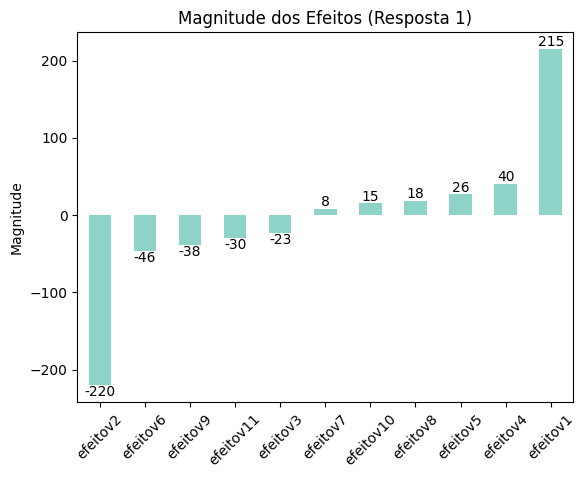

In [ ]:
#Gráfico dos efeitos brutos para a Resposta 1.

efeitosr1.plot(kind='bar', color='#8dd3c7')

for i, valor in enumerate(efeitosr1):
  if valor < 0:
    plt.text(i, valor, int(valor), ha='center', va='top')
  else:
    plt.text(i, valor, int(valor), ha='center', va='bottom')

plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.title('Magnitude dos Efeitos (Resposta 1)')
plt.show()

In [ ]:
# Criando um série com os efeitos para a Resposta 2
efeitosr2= pd.Series(efeitosr2)
efeitosr2.index = lista_efeitos
efeitosr2 = efeitosr2.sort_values(ascending=True)

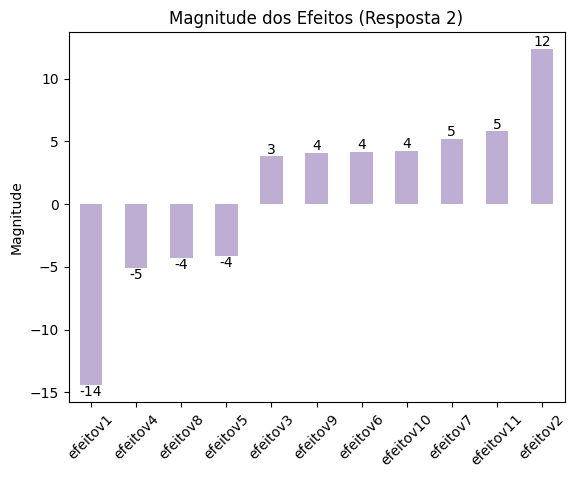

In [ ]:
#Gráfico dos efeitos brutos para a Resposta 2.

efeitosr2.plot(kind='bar', color='#beaed4')

for i, valor in enumerate(efeitosr2):
  if valor < 0:
    plt.text(i, valor, int(valor), ha='center', va='top')
  else:
    plt.text(i, valor, int(valor), ha='center', va='bottom')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.title('Magnitude dos Efeitos (Resposta 2)')
plt.show()

# Calculando a porcentagem de contribuição de cada efeito

In [ ]:
#Elevando os efeitos ao quadrado para retirar o sinal negativo
quadrado_efeitos_r1 = efeitosr1 ** 2
quadrado_efeitos_r2 = efeitosr2 ** 2

In [ ]:
#Somando todos os efeitos
soma_efeitos_r1 = quadrado_efeitos_r1.sum()
soma_efeitos_r2 = quadrado_efeitos_r2.sum()

In [ ]:
# Definindo a porcentagem de cada efeito
porcentagem_efeitos_r1 = (quadrado_efeitos_r1 / soma_efeitos_r1) * 100
porcentagem_efeitos_r2 = (quadrado_efeitos_r2 / soma_efeitos_r2) * 100

In [ ]:
#Colocando as porcentagens em ordem crescente
porcentagem_resposta1 = porcentagem_efeitos_r1.sort_values(ascending=True)
porcentagem_resposta2= porcentagem_efeitos_r2.sort_values(ascending=True)

# Gráfico de contribuição dos efeitos para a resposta 1 e 2

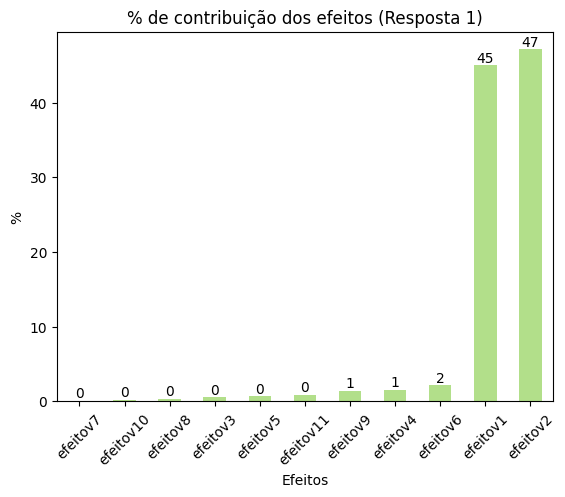

In [ ]:
# Gráfico de contribuição efetiva para a resposta 1

porcentagem_resposta1.plot(kind='bar', color='#b2df8a')
for i, valor in enumerate(porcentagem_resposta1):
  plt.text(i, valor, int(valor), ha='center', va='bottom')
plt.xlabel('Efeitos')
plt.ylabel('%')
plt.xticks(rotation=45)
plt.title('% de contribuição dos efeitos (Resposta 1)')
plt.show()


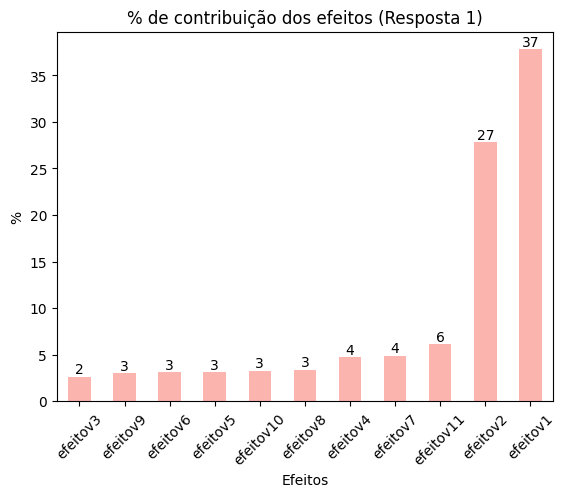

In [ ]:
# Gráfico de contribuição efetiva para a resposta 2

porcentagem_resposta2.plot(kind='bar', color='#fbb4ae')
for i, valor in enumerate(porcentagem_resposta2):
  plt.text(i, valor, int(valor), ha='center', va='bottom')
plt.xlabel('Efeitos')
plt.ylabel('%')
plt.xticks(rotation=45)
plt.title('% de contribuição dos efeitos (Resposta 1)')
plt.show()

# Função para calcular Z

Esta função retorna uma lista com os valores do score z, tendo como parâmetro de entrada o número de efeitos do experimento.

Nesse experimento, possímos apenas efeitos primários, então parâmetro de entrada da função é o número de variáveis, 11.

In [ ]:
def probabilidade(n_efeitos):

  zero = 0
  incremento = 1/n_efeitos
  elementos = n_efeitos

  inicio = [zero + i * incremento for i in range(elementos)]

  seq = list(range(1, (n_efeitos + 1)))

  final = [num/n_efeitos for num in seq]
  soma_listas = [x + y for x, y in zip(inicio, final)]

  ponto_central = [i /2 for i in soma_listas]

  media = np.mean(ponto_central)
  std = np.std(ponto_central)

  z = np.round([(i - media) / std for i in ponto_central], decimals=3)

  return z

In [ ]:
# Calculando os valores de z
z = probabilidade(11)

# Calculando o erro

Nesse planejamento, possuímos 6 réplicas no ponto central.
Porém, se olharmos com atenção, possuímos 3 réplicas para cada tipo de catalisador.

3 réplicas para o nível - 1 e 3 para o nível +1.

Devemos calcular o erro padrão para cada nível de cada resposta e então tirarmos a média do erro padrão para calcularmos o erro do efeito.

In [ ]:
#Selecionando apenas os pontos centrais para cada catalisador
r1_cat1 = pc['R1'][[12, 13, 14]]
r1_cat2 = pc['R1'][[15, 16, 17]]
r2_cat1 = pc['R2'][[12, 13, 14]]
r2_cat2 = pc['R2'][[15, 16, 17]]

In [ ]:
#Calculando o erro padrão para a resposta 1
std_r1_cat1 = np.std(r1_cat1)
std_r1_cat2 = np.std(r1_cat2)
std_r1_medio = (std_r1_cat1 + std_r1_cat2) / 2

In [ ]:
std_r1_medio

36.821771383791116

In [ ]:
#Calculando o erro padrão para a resposta 2
std_r2_cat1 = np.std(r2_cat1)
std_r2_cat2 = np.std(r2_cat2)
std_r2_medio = (std_r2_cat1 + std_r2_cat2) / 2

In [ ]:
std_r2_medio

0.6626810500900104

In [ ]:
#Calculando o denominador da equação
denominador = np.sqrt((3 * (2 ** 11)))


In [ ]:
denominador

78.38367176906169

In [ ]:
#Calculando o erro dos efeitos para a resposta 1 e 2
erro_efeito_r1 = (2 * std_r1_medio) / denominador
erro_efeito_r2 = (2 * std_r2_medio) / denominador

In [ ]:
erro_efeito_r1

0.9395265762052447

In [ ]:
erro_efeito_r2

0.016908650363877772

# Calculando o valor de t e definindo o intervalo de confiança para o erro

In [ ]:
# Valor de t para 95% de confiança e 5 graus de liberdade
from scipy.stats import t

alfa = 0.05

t_tabelado = t.ppf(1 - alfa/2, 4)


In [ ]:
t_tabelado

2.7764451051977987

In [ ]:
ic_r1 = erro_efeito_r1 * t_tabelado
ic_r2 = erro_efeito_r2 * t_tabelado

#Gráfico de Probabilidade com Intervalo de Confiança para o Erro

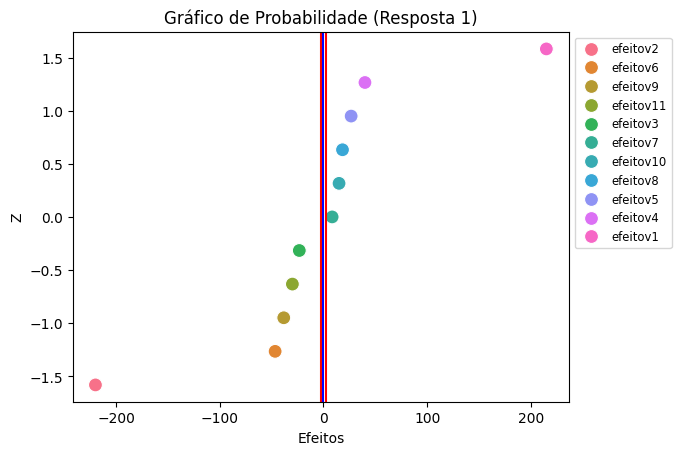

In [ ]:
# Gráfico de probabilidade para a resposta 1

limite_inferior = 0 - ic_r1
limite_superior = 0 + ic_r1
media = 0

sns.scatterplot(x=efeitosr1.values, y=z, hue=efeitosr1.index, s=100).set_title('Gráfico de Probabilidade (Resposta 1)')
plt.axvline(x=limite_inferior, color='r')
plt.axvline(x=limite_superior, color='r')
plt.axvline(x=media, color='b')
plt.xlabel('Efeitos')
plt.ylabel('Z')
plt.legend(fontsize='small', loc='lower left', bbox_to_anchor=(1, 0.4));

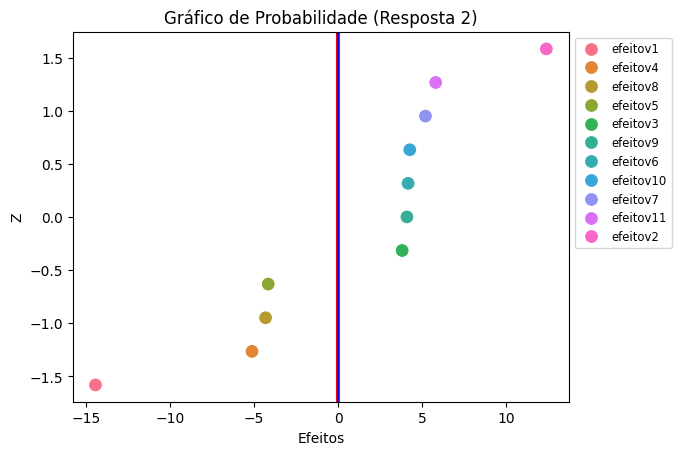

In [ ]:
# Gráfico de probabilidade para a resposta 2

limite_inferior = 0 - ic_r2
limite_superior = 0 + ic_r2
media = 0

sns.scatterplot(x=efeitosr2.values, y=z, hue=efeitosr2.index, s=100).set_title('Gráfico de Probabilidade (Resposta 2)')
plt.axvline(x=limite_inferior, color='r')
plt.axvline(x=limite_superior, color='r')
plt.axvline(x=media, color='b')
plt.xlabel('Efeitos')
plt.ylabel('Z')
plt.legend(fontsize='small', loc='lower left', bbox_to_anchor=(1, 0.4));

# Conclusão

Apesar de todos os efeitos serem estatisticamente significativos, observamos pelo gráfico de contribuição que para a Resposta 1 e 2, as variáveis 1 e 2 são as mais importantes.

Para a Resposta 2, algumas outras variáveis tem efeitos de menor importância, porém como o objetivo é realizar uma triagem e definir quais variáveis são mais importantes, então ficamos apenas com a variável 1, que é a concentração do polímero e a variável 2, que é a velocidade de agitação.

Após a triagem das variáveis, podemos refinar o modelo, fazendo um caminho de ascedência ao máximo e realizarmos otimização para encontrarmos o valor ótimo.

Nós próximos materiais, iremos falar um pouco sobre isso.

Até lá!